### Instalando o Valgrind

In [31]:
!apt-get install valgrind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  gdb gdbserver libbabeltrace1 libc6-dbg libdw1
Suggested packages:
  gdb-doc valgrind-dbg valgrind-mpi kcachegrind alleyoop valkyrie
The following NEW packages will be installed:
  gdb gdbserver libbabeltrace1 libc6-dbg libdw1 valgrind
0 upgraded, 6 newly installed, 0 to remove and 42 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 126 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdw1 amd64 0.170-0.4ubuntu0.1 [203 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libbabeltrace1 amd64 1.5.5-1 [154 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 gdb amd64 8.1.1-0ub

### Instalando o C++

In [33]:
!git config --global url."https://".insteadOf git://
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-j81ohel0
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-j81ohel0
  Created wheel for ColabPlugin: filename=ColabPlugin-blind-py3-none-any.whl size=12727 sha256=33afe4140db6a9b4dcecc8905bcd81dfa0bc1ffb8cf79b3d9aa6ff1deba39397
  Stored in directory: /tmp/pip-ephem-wheel-cache-nht3ic_9/wheels/97/a0/61/b9e5e1f61c5cfd624df291d57f6731a0f5832606b9ced448ef
Failed to build ColabPlugin
    Running setup.py install for ColabPlugin ... done
  DEPRECATION: ColabPlugin was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
fatal: destination path 'nvcc4jupyter' already exists and is not an empty directory.


Criando o arquivo da heurística

In [8]:
%%writefile heuristica.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;
struct dna
{
    int id;
    char dna_value;
};

struct dna_matrix
{
    int id;
    int value;
    int x_last;
    int y_last;
    int x_current;
    int y_current;
    char x_value;
    char y_value;
};

int main() {

    // Defining n and m. Value of n is the length of the first sequence. Value of m is the length of the second sequence.
    int n; int m;

    // Reads n and m. 
    cin >> n >> m;

    // Defining the two vectors that receive the sequences.
    vector<dna> dnas_first_seq;
    vector<dna> dnas_second_seq;

    // Reserving n and m length on the vectors.
    dnas_first_seq.reserve(n);
    dnas_second_seq.reserve(m);

    dna dna_next;

    // Reads the first sequence and completes the dna_first_seq vector with the sequence.
    for(int i = 0; i < n; i++) {
        cin >> dna_next.dna_value;
        dna_next.id = i;
        dnas_first_seq.push_back(dna_next);
    }

    // Reads the second sequence and completes the dna_second_seq vector with the sequence.
    for(int i = 0; i < m; i++) {
        cin >> dna_next.dna_value;
        dna_next.id = i;
        dnas_second_seq.push_back(dna_next);
    }

    // Creating the matrix that will be used to Smith-Waterman algorithm.
    vector<vector<dna_matrix> > matrix;

    vector<dna_matrix> line;

    dna_matrix line_matrix;

    // Creating the first line of zeros of the matrix.
    for (int i = 0; i <= n; i++) {
        line_matrix.id = i;
        line_matrix.value = 0;
        line_matrix.x_last = 0;
        line_matrix.y_last = 0;
        line.push_back(line_matrix);
    }
    matrix.push_back(line);

    // Creating the first column with zeros of the matrix.
    for (int i = 1; i <= n; i++) {
        vector<dna_matrix> line_loop;
        for (int j = 0; j <= m; j++) {
            if (j == 0){
                line_loop.push_back(line_matrix);
            } else {
                line_loop.push_back(line_matrix);
            }
        }
        matrix.push_back(line_loop);
    }

    // Loop over the matrix
    for (int i = 1; i <= n; i++) {
        for (int j = 1; j <= m; j++) {
            int diagonal = 0;

            matrix[i][j].x_value = dnas_first_seq[i-1].dna_value;
            matrix[i][j].y_value = dnas_second_seq[j-1].dna_value;

            // Calculate the diagonal. Seeing if its a mismatch, a gap or a match.
            if (dnas_first_seq[i-1].dna_value == dnas_second_seq[j-1].dna_value) {
                diagonal = matrix[i-1][j-1].value + 2;
            } else {
                diagonal = matrix[i-1][j-1].value - 1;
            }

            // Calculate the delection.
            int delection = matrix[i-1][j].value - 1;
            // Calculate the insertion.
            int insertion = matrix[i][j-1].value - 1;
            // Get the maximum between diagonal, delection, insertion and 0.
            int max_between_diagonal_delection = max(diagonal,delection);
            int max_between_diagonal_delection_insertion = max(max_between_diagonal_delection, insertion);
            int max_between_diagonal_delection_insertion_zero = max(max_between_diagonal_delection_insertion, 0);
            matrix[i][j].value = max_between_diagonal_delection_insertion_zero;

            if (max_between_diagonal_delection_insertion_zero == diagonal) {
                matrix[i][j].x_last = i - 1;
                matrix[i][j].y_last = j - 1;
                matrix[i][j].x_current = i;
                matrix[i][j].y_current = j;
            } else if (max_between_diagonal_delection_insertion_zero == delection) {
                matrix[i][j].x_last = i - 1;
                matrix[i][j].y_last = j;
                matrix[i][j].x_current = i;
                matrix[i][j].y_current = j;
            } else if (max_between_diagonal_delection_insertion_zero == insertion) {
                matrix[i][j].x_last = i;
                matrix[i][j].y_last = j - 1;
                matrix[i][j].x_current = i;
                matrix[i][j].y_current = j;
            } else {
                matrix[i][j].x_last = i - 1;
                matrix[i][j].y_last = j - 1;
                matrix[i][j].x_current = i;
                matrix[i][j].y_current = j;
            }
        }
    }

    // for(auto& el: matrix) {
    //    for(auto& element: el) {
    //        cout << element.value;
    //    }
    //    cout << endl;
    // }

    // Get the max element of the matrix.
    dna_matrix max_element;
    for (int i = 0; i <= n; i++) {
        for (int j = 0; j <= m; j++) {
            if (matrix[i][j].value > max_element.value) {
                max_element = matrix[i][j];
            }
        }
    }

    int i = max_element.x_current;
    int j = max_element.y_current;
    int value_max_element = max_element.value;

    vector<char> first_seq_answer;
    vector<char> second_seq_answer;

    // Get the best sequence.
    while (matrix[i][j].x_current != 0 || matrix[i][j].y_current != 0) {

        first_seq_answer.push_back(matrix[i][j].x_value);
        second_seq_answer.push_back(matrix[i][j].y_value);

        i = matrix[i][j].x_last;
        j = matrix[i][j].y_last;

        if (matrix[i][j].x_current == 0 || matrix[i][j].y_current == 0) {
            first_seq_answer.push_back(matrix[i][j].x_value);
            second_seq_answer.push_back(matrix[i][j].y_value);
            break;
        }
    }

    for (auto& el: first_seq_answer) {
        cout << el;
    }

    cout << endl;

    for (auto& el: second_seq_answer) {
        cout << el;
    }

    return 0;
}



Overwriting heuristica.cpp


In [9]:
!g++ -g heuristica.cpp -o heuristica

### Criando o primeiro arquivo de entrada contendo duas sequências de 1000 elementos

In [29]:
%%writefile in4.txt
1000
1000
AT-TT-GGGGC--CCGC-GATCCC-AC-G-CAG-GC-CGCCT-C-AGTT-GTTT-TCCGAAATGT--T-G-A-TTGGCA-ATCTGTT--A-C-CGGGCATCT-GGGC-C-ATCTACT-G-GTCTTA-ATTAGGTTGTTA-AT-CA-GGCCAGAAGGAAA--TGTATA-GTTTCAG-CA--GAT--CTTCAACACAGTA--TA-AGCAAG-CGGC-TC-GCTGCTGAGTGATTGT-CGAAC--ATGAGTT--GGTGC-ATTT-ATGTT--CTAATATCT-GCAGCGAAGACTAGGTAC-GTGG-C-ACCGTCCAGAGGAAAT-GGCTTAGCTCTAG-GCCTCTCGTTTT-GA-ATGG-G-C-GGTGC-C-CGG-A-CCTAC-C-GT--GGCGC-CCCT-TAAGGACA--CTC-GCCCACGG--AGAGA-TAT-GACA-G-TTGGACCACAT-C-CA-GTT-C-AGG-CCGTGAA---CAGTGATC-TACTAT-TT-C-CGT--GGTG--GTAGTAGAG-T--CTTCC-AAGA-TAGAACTACAC-GTAT-TAG-CGG-T--TAAA-CTTAGTAGCTGA-CATT-GGA-AAT-GCTTCCGCGCCAG-CTACACGCA-TGAAGT-CTTAGAG-TG-GGTGTTCACGGATC-GAAGCGTCGG-GGACGTACGGTTTGGA--GT-CG--CT--TG-A-AAACCTCT-T-CT-GAT-AGCTAGGTG-ACACGTCTTTGGTG-TCAATAAA-A-AGTTGGGC-AGGT-TATTA-CTAC-TAAGAC--CGA-CT-GCTGG-TT-GGTGCCT-AA--CGGCTGATA-CCTGTT-TA-GAGCCT-TTTGCAT-C-TATAC-ACG-TACA-AA--GTTTAA---T-GAGTC---CGT-GC-GACGCTTT--G-TCAC-CGCG--AGTGTAG-G-GCGC-AAAT-AG-GTG-CGC-T-TTAGC-CCACGTG--TGT-GAC--TA-A-TAAA-C-GTCACC-TGAA-TG-GTG
G-AG-TTT-GTGTGC-AGAAATGCTCGTCATCT-TTGA-CA-CTAGTTATGC-AGGTTC-C-CCACCGCG-GA-ACTATCGTGCTGCATAGCACCAA-GGGAGTTGACTGG-GG--CTCATAC-G--ACTG--GCCAGCTT-AGCGGTACCGATCGGAT---TGCGCTGTA-ACCCATG-CCA-GACATCCTGCT-T-CGTCCCAGCGCGTCTAGTGTTTAC-GA--ACATG-G--GAT-G-CATGGTA-CGTAGTC-C-CCACAATT--T-TCTCTCCGGCGAGC-TAA--GGAA--T-T-CG-ACGAGC-T-TGAAA--C-TGGCTA-----T--CAT-CCGC--ACCTGGCACT---GGAGTGACTGAACG-GAGTGCCGTGAAGC---CGGAGG-AAAAT-AGCT-TGCCAGCCACC-CG--C-ACGGTCG-GTT-CAC-ACG--GCAAAG--TA-GGAACGGGTCCG-CCA-AACCGGAGATT-TGT-TA-T-T-TGCTCCACG-G--C-GTGA-GGGGCAA-T-GTACTCTT--GAGCATTGCT-CTTACTTACGTTG-TA-G-ACGTAGTGAGTGCGAC-GGAGTC--GACCCGCCTTGCCG-AAAACGTGTATTCGACT-C-TTGG-GC-GTTATATCT--AT-TCGTTG-TCCATGTAA----TA-GATTT-TA-TAGGTATC-CG-TAAA-TCACGGC-ATTAT-GTCTCCAC-ACTATTACT-AA-CGGTTGATA-G-CTTATG---AATAAGGG-TTTCTATT-AGATCCGTCGGGA-GAGG-A---GTATATGA-G--GGAC-GG-AAC--AGGGCATGCGCT--AT-TTACTGCG--TCCCA-GAT-A-CGGG-GGTTAACT-TTTCCG-ACC-ACGCTGGCTG-A-CAG-ACG--GTC---A-GCA-TTAG-G-GCACA-CTCTGGATGGCA-AGTTTC-ATTTG-AGA-TTAT-TGATC-A-ATGGA-C--GAC-TG-GTTCAG

Writing in4.txt


### Executando o valgrind e o callgrind annotate para a heurística

In [11]:
!valgrind --tool=callgrind ./heuristica < in4.txt

==616== Callgrind, a call-graph generating cache profiler
==616== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==616== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==616== Command: ./heuristica
==616== 
==616== For interactive control, run 'callgrind_control -h'.
==616== brk segment overflow in thread #1: can't grow to 0x4a2c000
==616== (see section Limitations in user manual)
==616== NOTE: further instances of this message will not be shown
==616== 
==616== Process terminating with default action of signal 2 (SIGINT)
==616==    at 0x109993: main (heuristica.cpp:162)
==616== 
==616== Events    : Ir
==616== Collected : 52984901045
==616== 
==616== I   refs:      52,984,901,045
^C


In [13]:
!callgrind_annotate callgrind.out.616 heuristica.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.616' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 7154849305
Trigger: Program termination
Profiled target:  ./heuristica (PID 616, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   heuristica.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
            Ir 
--------------------------------------------------------------------------------
52,984,901,045  PROGRAM TOTALS

--------------------------------------------------------------------------------
            Ir  file:function
--------------------------------------------------------------------------------
11,942,416,469  heuristica.cpp:main [/content/heuristica]
10,8

De acordo com o resultado do profilling do projeto 1, da heuristíca, é possível verificar que existe uma grande quantidade de acessos a memória, na casa dos bilhões. Além disso é possível observar que o ponto que teve mais lentidão foi a montagem da resposta fazendo o *trace* de toda a cadeia do sequenciamento genético. Mas mesmo assim podemos observar que o código é eficiente mesmo para entradas grandes com os seguintes tempos:

In [22]:
from tabulate import tabulate

In [20]:
table = [['Tamanho das sequências', 'Tempo'], ['200x200', '0.0043'], ['400x200', '0.0117'], ['400x400', '0.0159'], ['1000x1000', '0.0284']]

In [24]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------------+---------+
| Tamanho das sequências   |   Tempo |
+==========================+=========+
| 200x200                  |  0.0043 |
+--------------------------+---------+
| 400x200                  |  0.0117 |
+--------------------------+---------+
| 400x400                  |  0.0159 |
+--------------------------+---------+
| 1000x1000                |  0.0284 |
+--------------------------+---------+


### Criando o arquivo da busca local

In [26]:
%%writefile busca_local.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <random>
#include <cstdlib>

using namespace std;
struct dna
{
    int id;
    char dna_value;
};

int main() {

    int score_max_global = 0;
    vector<char> subsequence_a_max_score_global;
    vector<char> subsequence_b_max_score_global;

    // Defining n and m. Value of n is the length of the first sequence. Value of m is the length of the second sequence.
    int n; int m;

    // Reads n and m. 
    cin >> n >> m;

    // Defining the two vectors that receive the sequences.
    vector<dna> dnas_first_seq;
    vector<dna> dnas_second_seq;

    // Reserving n and m length on the vectors.
    dnas_first_seq.reserve(n);
    dnas_second_seq.reserve(m);

    dna dna_next;

    // Reads the first sequence and completes the dna_first_seq vector with the sequence.
    for(int i = 0; i < n; i++) {
        cin >> dna_next.dna_value;
        dna_next.id = i;
        dnas_first_seq.push_back(dna_next);
    }

    // Reads the second sequence and completes the dna_second_seq vector with the sequence.
    for(int i = 0; i < m; i++) {
        cin >> dna_next.dna_value;
        dna_next.id = i;
        dnas_second_seq.push_back(dna_next);
    }
    
    // Generate one thousand values for k in random form.
    for (int z = 0; z < 10000; z++) {
        random_device random;
        mt19937 generator(random());
        uniform_int_distribution<int> distribution(1,m);
        int k = distribution(generator);
        vector<char> subsequence_b;
        // Creates subsequence b with the first k elements of sequence b.
        for (int i = 0; i < k; i++) {
            subsequence_b.push_back(dnas_second_seq[i].dna_value);
        }

        // Creates matrix that will receive the subsequences of a.
        vector<vector<char> > subsequences_a;

        int counter = 0;
        vector<dna> dnas_first_seq_flexible = dnas_first_seq;

        // Create empty vectors inside the matrix.
        while(dnas_first_seq_flexible.size() - k + 1 > 0) {
            vector<char> subsequence_a;
            subsequences_a.push_back(subsequence_a);
            dnas_first_seq_flexible.erase(dnas_first_seq_flexible.begin());
        }
        
        dnas_first_seq_flexible = dnas_first_seq;

        // Create the subsequences of a.
        while(dnas_first_seq_flexible.size() - k + 1 > 0) {
            for (int i = 0; i < k; i++) {
                subsequences_a[counter].push_back(dnas_first_seq_flexible[i].dna_value);
            }
            counter++;
            dnas_first_seq_flexible.erase(dnas_first_seq_flexible.begin());
        }

        // Create vector of scores.
        vector<int> scores;

        int sum_score_pair = 0;
        // Generate scores.
        for (int i = 0; i < subsequences_a.size(); i++) {
            for (int j = 0; j < subsequences_a[0].size(); j++) {
                if (subsequences_a[i][j] == subsequence_b[j]) {
                    sum_score_pair += 2;
                } else {
                    sum_score_pair -= 1;
                }
            }
            scores.push_back(sum_score_pair);
            sum_score_pair = 0;
        }

        // Gets the index of the max score and the value.
        int score_max_index = max_element(scores.begin(),scores.end()) - scores.begin();
        int score_max = *max_element(scores.begin(), scores.end());

        // Compares max score global with actual max score. If max score global equals
        // to actual max score and if actual max score has subsequence bigger than 
        // max score global change max score global to actual max score and change subsequences.
        if (score_max == score_max_global) {
            if(subsequences_a[score_max_index].size() > subsequence_a_max_score_global.size()) {
                subsequence_a_max_score_global = subsequences_a[score_max_index];
                subsequence_b_max_score_global = subsequence_b;
            }
        }

        // If actual max score bigger than max score global change max score global and its subsequences.
        if (score_max > score_max_global) {
            score_max_global = score_max;
            subsequence_a_max_score_global = subsequences_a[score_max_index];
            subsequence_b_max_score_global = subsequence_b;
        }
    }

    cout << score_max_global << endl;

    for (auto& el: subsequence_a_max_score_global) {
        cout << el;
    }

    cout << endl;

    for (auto& el: subsequence_b_max_score_global) {
        cout << el;
    }
}

Writing busca_local.cpp


In [42]:
!g++ -g busca_local.cpp -o busca_local

### Executando o valgrind e o callgrind annotate para busca local

In [43]:
!valgrind --tool=callgrind ./busca_local < in4.txt

==1068== Callgrind, a call-graph generating cache profiler
==1068== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1068== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==1068== Command: ./busca_local
==1068== 
==1068== For interactive control, run 'callgrind_control -h'.
==1068== brk segment overflow in thread #1: can't grow to 0x4a2c000
==1068== (see section Limitations in user manual)
==1068== NOTE: further instances of this message will not be shown
==1068== 
==1068== Process terminating with default action of signal 2 (SIGINT)
==1068==    at 0x10965D: main (busca_local.cpp:79)
==1068== 
==1068== Events    : Ir
==1068== Collected : 11408822235
==1068== 
==1068== I   refs:      11,408,822,235
^C


In [46]:
!callgrind_annotate callgrind.out.1068 busca_local.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1068' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 2572265586
Trigger: Program termination
Profiled target:  ./busca_local (PID 1068, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   busca_local.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
            Ir 
--------------------------------------------------------------------------------
11,408,822,235  PROGRAM TOTALS

--------------------------------------------------------------------------------
           Ir  file:function
--------------------------------------------------------------------------------
2,310,327,543  busca_local.cpp:main [/content/busca_local]


O profilling do código de busca local aponta que a montagem das subsequências de a e o cálculo da pontuação são os pontos que mais apresentaram lentidão.

In [39]:
table = [['Tamanho das sequências', 'Tempo'], ['200x200', '0.6649'], ['400x200', '1.5086'], ['400x400', '1.3414'], ['1000x1000', '5.8454']]

In [40]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------------+---------+
| Tamanho das sequências   |   Tempo |
+==========================+=========+
| 200x200                  |  0.6649 |
+--------------------------+---------+
| 400x200                  |  1.5086 |
+--------------------------+---------+
| 400x400                  |  1.3414 |
+--------------------------+---------+
| 1000x1000                |  5.8454 |
+--------------------------+---------+


### Criando o arquivo da busca exaustiva

In [47]:
%%writefile busca_exaustiva.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

void create_subsequences(vector<char>& dnas, vector<vector<char> >& subsequences, vector<char>& subsequence, int index, int n){
    if (index == n){
        // Compares if subsequence string is in dnas string. If its in add it to the matrix.
        string subsequence_string(subsequence.begin(), subsequence.end());
        string dnas_string(dnas.begin(), dnas.end());
        if (dnas_string.find(subsequence_string) != string::npos) {
            subsequences.push_back(subsequence);
        }
    } else {
        subsequence.push_back(dnas[index]);
        create_subsequences(dnas, subsequences, subsequence, index + 1, n);
        subsequence.pop_back();
        create_subsequences(dnas, subsequences, subsequence, index + 1, n);

    }
}



int main() {

    // Defining n and m. Value of n is the length of the first sequence. Value of m is the length of the second sequence.
    int n; int m;

    // Reads n and m. 
    cin >> n >> m;

    // Defining the two vectors that receive the sequences.
    vector<char> dnas_first_seq;
    vector<char> dnas_second_seq;

    // Reserving n and m length on the vectors.
    dnas_first_seq.reserve(n);
    dnas_second_seq.reserve(m);

    char dna_next;

    // Reads the first sequence and completes the dna_first_seq vector with the sequence.
    for(int i = 0; i < n; i++) {
        cin >> dna_next;
        dnas_first_seq.push_back(dna_next);
    }

    // Reads the second sequence and completes the dna_second_seq vector with the sequence.
    for(int i = 0; i < m; i++) {
        cin >> dna_next;
        dnas_second_seq.push_back(dna_next);
    }
    
    // Creating matrixes that will contain the subsequences of a and b.
    vector<vector<char> > subsequences_a;
    vector<vector<char> > subsequences_b;

    vector<char> subsequence_a;
    vector<char> subsequence_b;

    // Creating subsequences recursively.
    create_subsequences(dnas_first_seq, subsequences_a, subsequence_a, 0, n);
    create_subsequences(dnas_second_seq, subsequences_b, subsequence_b, 0, m);

    // Erase duplicates.
    subsequences_a.erase(unique(subsequences_a.begin(), subsequences_a.end()), subsequences_a.end());
    subsequences_b.erase(unique(subsequences_b.begin(), subsequences_b.end()), subsequences_b.end());

    // Create matrix that will contain the scores.
    vector<vector<int> > scores;

    vector<int> scores_next;

    for (int i = 0; i < subsequences_a.size(); i++) {
        scores.push_back(scores_next);
    }

    int sum_score_pair = 0;

    // Calculate scores. If subsequence of a bigger than subsequence of b calculate
    // for all elements of b and the first elements of a that has the same size of 
    // b subsequence. Else the inverse.
    for (int i = 0; i < subsequences_a.size(); i++) {
        for (int j = 0; j < subsequences_b.size(); j++) {
            if (subsequences_a[i].size() > subsequences_b[j].size()) {
                for (int k = 0; k < subsequences_b[j].size(); k++) {
                    if (subsequences_a[i][k] == subsequences_b[j][k]) {
                        sum_score_pair+=2;
                    } else {
                        sum_score_pair-=1;
                    }
                }
            } else {
                for (int k = 0; k < subsequences_a[i].size(); k++) {
                    if (subsequences_a[i][k] == subsequences_b[j][k]) {
                        sum_score_pair+=2;
                    } else {
                        sum_score_pair-=1;
                    }
                }
            }
            scores[i].push_back(sum_score_pair);
            sum_score_pair = 0;
        }
    }

    int max_score = 0;

    int max_x = 0;
    int max_y = 0;


    // Get the max score and the subsequences correlated to the max score.
    for (int i = 0; i < scores.size(); i++) {
        for (int j = 0; j < scores[0].size(); j++) {
            if (scores[i][j] > max_score) {
                max_x = i;
                max_y = j;
                max_score = scores[i][j];
            }
        }
    }

    cout << max_score;
    cout << endl;

    for(auto& subsequence_a: subsequences_a[max_x]) {
        cout << subsequence_a;
    }

    cout << endl;

    for(auto& subsequence_b: subsequences_b[max_y]) {
        cout << subsequence_b;
    }


}

Overwriting busca_exaustiva.cpp


In [48]:
!g++ -g busca_exaustiva.cpp -o busca_exaustiva

### Criando o primeiro arquivo de entrada para a busca exaustiva

In [51]:
%%writefile in4_busca_exaustiva.txt
30
30
TTACCGGCTACCCAAAC-CTAG-GGT-GAA
-G--TCA-AC-CT-TGTAA-TCCCCGGCTA

Writing in4_busca_exaustiva.txt


### Executando o Valgrind e o callgrind annotate para a busca exaustiva

In [54]:
!valgrind --tool=callgrind ./busca_exaustiva < in4_busca_exaustiva.txt

==1239== Callgrind, a call-graph generating cache profiler
==1239== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1239== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==1239== Command: ./busca_exaustiva
==1239== 
==1239== For interactive control, run 'callgrind_control -h'.
==1239== brk segment overflow in thread #1: can't grow to 0x4a2c000
==1239== (see section Limitations in user manual)
==1239== NOTE: further instances of this message will not be shown
==1239== 
==1239== Process terminating with default action of signal 2 (SIGINT)
==1239==    at 0x10AC3E: __gnu_cxx::__normal_iterator<char*, std::vector<char, std::allocator<char> > >::operator*() const (stl_iterator.h:795)
==1239==    by 0x10DC5A: void std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >::_S_copy_chars<__gnu_cxx::__normal_iterator<char*, std::vector<char, std::allocator<char> > > >(char*, __gnu_cxx::__normal_iterator<char*, std::vector<char, std

In [55]:
!callgrind_annotate callgrind.out.1239 busca_exaustiva.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1239' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 6870820786
Trigger: Program termination
Profiled target:  ./busca_exaustiva (PID 1239, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   busca_exaustiva.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
            Ir 
--------------------------------------------------------------------------------
37,519,952,234  PROGRAM TOTALS

--------------------------------------------------------------------------------
           Ir  file:function
--------------------------------------------------------------------------------
7,054,667,040  /usr/include/c++/7/bits/stl_iterator

O principal ponto de lentidão da busca exaustiva é na geração das subsequências. Os tempos de execução da busca exaustiva começam baixos e tem um aumento de quase 4000 vezes como pode ser observado na tabela a seguir mesmo para entradas pequenas.

In [56]:
table = [['Tamanho das sequências', 'Tempo'], ['10x10', '0.05'], ['20x20', '0.65'], ['20x30', '100.36'], ['30x30', '199.62']]

In [57]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------------+---------+
| Tamanho das sequências   |   Tempo |
+==========================+=========+
| 10x10                    |    0.05 |
+--------------------------+---------+
| 20x20                    |    0.65 |
+--------------------------+---------+
| 20x30                    |  100.36 |
+--------------------------+---------+
| 30x30                    |  199.62 |
+--------------------------+---------+


### Criando o arquivo da estratégia de *branch and bound*

In [58]:
%%writefile branch_and_bound.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

void create_subsequences(vector<char>& dnas, vector<vector<char> >& subsequences, vector<char>& subsequence, int index, int n){
    if (index == n){
        // Compares if subsequence string is in dnas string. If its in add it to the matrix.
        string subsequence_string(subsequence.begin(), subsequence.end());
        string dnas_string(dnas.begin(), dnas.end());
        if (dnas_string.find(subsequence_string) != string::npos) {
            subsequences.push_back(subsequence);
        }
    } else {
        subsequence.push_back(dnas[index]);
        create_subsequences(dnas, subsequences, subsequence, index + 1, n);
        subsequence.pop_back();
        create_subsequences(dnas, subsequences, subsequence, index + 1, n);

    }
}



int main() {

    int sum_score_pair_global = 0;
    int max_x = 0;
    int max_y = 0;

    // Defining n and m. Value of n is the length of the first sequence. Value of m is the length of the second sequence.
    int n; int m;

    // Reads n and m. 
    cin >> n >> m;

    // Defining the two vectors that receive the sequences.
    vector<char> dnas_first_seq;
    vector<char> dnas_second_seq;

    // Reserving n and m length on the vectors.
    dnas_first_seq.reserve(n);
    dnas_second_seq.reserve(m);

    char dna_next;

    // Reads the first sequence and completes the dna_first_seq vector with the sequence.
    for(int i = 0; i < n; i++) {
        cin >> dna_next;
        dnas_first_seq.push_back(dna_next);
    }

    // Reads the second sequence and completes the dna_second_seq vector with the sequence.
    for(int i = 0; i < m; i++) {
        cin >> dna_next;
        dnas_second_seq.push_back(dna_next);
    }
    
    // Creating matrixes that will contain the subsequences of a and b.
    vector<vector<char> > subsequences_a;
    vector<vector<char> > subsequences_b;

    vector<char> subsequence_a;
    vector<char> subsequence_b;

    // Creating subsequences recursively.
    create_subsequences(dnas_first_seq, subsequences_a, subsequence_a, 0, n);
    create_subsequences(dnas_second_seq, subsequences_b, subsequence_b, 0, m);

    // Erase duplicates.
    subsequences_a.erase(unique(subsequences_a.begin(), subsequences_a.end()), subsequences_a.end());
    subsequences_b.erase(unique(subsequences_b.begin(), subsequences_b.end()), subsequences_b.end());

    // Create matrix that will contain the scores.
    vector<vector<int> > scores;

    vector<int> scores_next;

    for (int i = 0; i < subsequences_a.size(); i++) {
        scores.push_back(scores_next);
    }

    int sum_score_pair = 0;

    // Calculate scores. If subsequence of a bigger than subsequence of b calculate
    // for all elements of b and the first elements of a that has the same size of 
    // b subsequence. Else the inverse.
    for (int i = 0; i < subsequences_a.size(); i++) {
        for (int j = 0; j < subsequences_b.size(); j++) {
            if (subsequences_a[i].size() > subsequences_b[j].size()) {
                for (int k = 0; k < subsequences_b[j].size(); k++) {
                    int bound = (2 * (subsequences_b[j].size() - j));
                    if(sum_score_pair + bound >= sum_score_pair_global) {
                        if (subsequences_a[i][k] == subsequences_b[j][k]) {
                            sum_score_pair+=2;
                        } else {
                            sum_score_pair-=1;
                        }                    
                    } else {
                        scores[i].push_back(sum_score_pair);
                        sum_score_pair = 0;
                        break;
                    }
                }
            } else {
                for (int k = 0; k < subsequences_a[i].size(); k++) {
                    int bound = (2 * (subsequences_a[i].size() - i));
                    if(sum_score_pair + bound >= sum_score_pair_global) {
                        if (subsequences_a[i][k] == subsequences_b[j][k]) {
                            sum_score_pair+=2;
                        } else {
                            sum_score_pair-=1;
                        }                    
                    } else {
                        scores[i].push_back(sum_score_pair);
                        sum_score_pair = 0;
                        break;
                    }
                }
            }
            // If actual score bigger or equal to global score replace global score with
            // actual score and change x and y references to position of subsequences
            // in the matrixes.
            if (sum_score_pair >= sum_score_pair_global) {
                sum_score_pair_global = sum_score_pair;
                max_x = i;
                max_y = j;
            }
            scores[i].push_back(sum_score_pair);
            sum_score_pair = 0;
        }
    }


    // Print results
    cout << sum_score_pair_global;
    cout << endl;

    for(auto& subsequence_a: subsequences_a[max_x]) {
        cout << subsequence_a;
    }

    cout << endl;

    for(auto& subsequence_b: subsequences_b[max_y]) {
        cout << subsequence_b;
    }
}

Writing branch_and_bound.cpp


In [59]:
!g++ -g branch_and_bound.cpp -o bb

### Executando o Valgrind e o callgrind annotate para o *branch and bound*

In [60]:
!valgrind --tool=callgrind ./bb < in4_busca_exaustiva.txt

==1424== Callgrind, a call-graph generating cache profiler
==1424== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1424== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==1424== Command: ./bb
==1424== 
==1424== For interactive control, run 'callgrind_control -h'.
==1424== brk segment overflow in thread #1: can't grow to 0x4a2c000
==1424== (see section Limitations in user manual)
==1424== NOTE: further instances of this message will not be shown
==1424== 
==1424== Process terminating with default action of signal 2 (SIGINT)
==1424==    at 0x10ABD0: bool __gnu_cxx::operator!=<char*, std::vector<char, std::allocator<char> > >(__gnu_cxx::__normal_iterator<char*, std::vector<char, std::allocator<char> > > const&, __gnu_cxx::__normal_iterator<char*, std::vector<char, std::allocator<char> > > const&) (stl_iterator.h:886)
==1424==    by 0x10DC78: void std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >::_S_copy_chars<__gnu

In [61]:
!callgrind_annotate callgrind.out.1424 branch_and_bound.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1424' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 2090287552
Trigger: Program termination
Profiled target:  ./bb (PID 1424, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   branch_and_bound.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
            Ir 
--------------------------------------------------------------------------------
11,425,794,350  PROGRAM TOTALS

--------------------------------------------------------------------------------
           Ir  file:function
--------------------------------------------------------------------------------
2,154,081,009  /usr/include/c++/7/bits/stl_iterator.h:bool __gn

É possível observar que mesmo na estrategia *branch and bound* a criação das subsequências é o que deixa mais lenta a execução. Já os tempos do *branch and bound* são melhores para entradas menores e a medida que as entradas vão aumentando os tempos vão se aproximando dos tempos da busca exaustiva.

In [62]:
table = [['Tamanho das sequências', 'Tempo'], ['10x10', '0.01'], ['20x20', '0.30'], ['20x30', '99.47'], ['30x30', '197.41']]

In [63]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------------+---------+
| Tamanho das sequências   |   Tempo |
+==========================+=========+
| 10x10                    |    0.01 |
+--------------------------+---------+
| 20x20                    |    0.3  |
+--------------------------+---------+
| 20x30                    |   99.47 |
+--------------------------+---------+
| 30x30                    |  197.41 |
+--------------------------+---------+


### Criando os gráficos de tamanhos de entrada para os tempos

In [15]:
times_heuristic = [0.0043, 0.0117, 0.0159, 0.0284]
length_heuristic = ["200x200", "400x200", "400x400", "1000x1000"]

times_local_search = [0.6649, 1.5086, 1.3414, 5.8454]
length_local_search = ["200x200", "400x200", "400x400", "1000x1000"]

times_exhaustive_search_first_program = [0.05, 0.65, 100.36, 199.62]
times_exhaustive_search_second_program = [0.01, 0.30, 99.47, 197.41]

length_exhaustive_search = ["10x10", "20x20", "20x30", "30x30"]


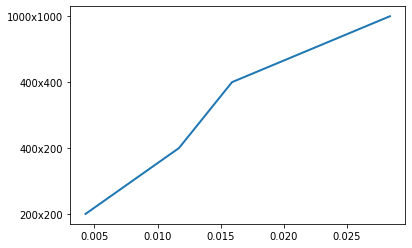

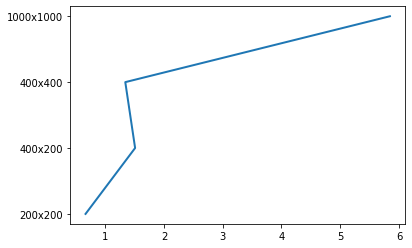

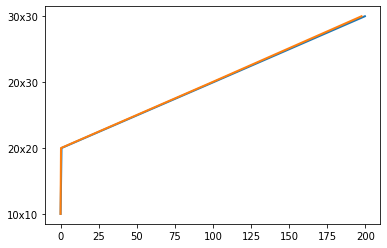

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times_heuristic, length_heuristic, linewidth=2.0)
plt.show()
fig, ax = plt.subplots()
ax.plot(times_local_search, length_local_search, linewidth=2.0)
plt.show()
fig, ax = plt.subplots()
ax.plot(times_exhaustive_search_first_program, length_exhaustive_search, linewidth=2.0)
ax.plot(times_exhaustive_search_second_program, length_exhaustive_search, linewidth=2.0)
plt.show()


 Nos gráficos acima podemos notar um aumento gradativo para os dois primeiros algoritmos que são a heurística e a busca local enquanto que na busca exaustiva tem um aumento repentino de mais de 100 vezes entre a entrada de 20x20 (tamanho das sequências) com a de 20x30. É possível notar também que a busca exaustiva leva um tempo bem maior do que os outros dois algoritmos para entradas menores.

### Análise com várias entradas para heurística

In [124]:
import random
import subprocess
import time

times_heuristic = []
length_heuristic = []
heuristic = []

for i in range(0, 10):
    n = random.randrange(1000) # tamanho da primeira sequência
    m = random.randrange(1000) # tamanho da segunda sequência
    file = 'dna.seq' # nome do arquivo a ser gerado
    f = open(file, 'w')
    seq=[str(n)+'\n',
        str(m)+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=m))]
    f.writelines(seq)
    f.close()
    
    initial_time = time.time()

    subprocess.run("./heuristica < dna.seq", shell=True)

    final_time = time.time()

    difference_between_times = final_time - initial_time

    heuristic.append({"Time": str("%.4f" % difference_between_times), "Length": str(n) + "x" + str(m), "Value": n + m})


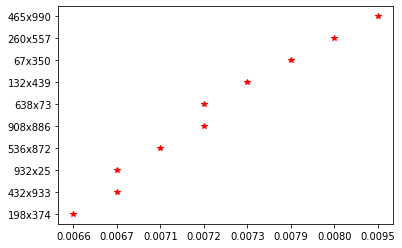

In [125]:
def bigger_value(element):
    return element['Time']

heuristic.sort(key=bigger_value)


for i in heuristic:
    times_heuristic.append(i['Time'])
    length_heuristic.append(i['Length'])

fig, ax = plt.subplots()
ax.plot(times_heuristic, length_heuristic, 'r*')
plt.show()

É possível observar no gráfico acima que para entradas maiores o programa demora mais para executar mas mesmo assim consegue rodar em tempos pequenos.

### Análise com várias entradas para busca local

In [127]:
times_local_search = []
length_local_search = []
local_search = []

for i in range(0, 10):
    n = random.randrange(1000) # tamanho da primeira sequência
    m = random.randrange(1000) # tamanho da segunda sequência
    file = 'dna.seq' # nome do arquivo a ser gerado
    f = open(file, 'w')
    seq=[str(n)+'\n',
        str(m)+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=m))]
    f.writelines(seq)
    f.close()

    initial_time = time.time()

    subprocess.run("./busca_local < dna.seq", shell=True)

    final_time = time.time()

    difference_between_times = final_time - initial_time

    local_search.append({"Time": str("%.3f" % difference_between_times), "Length": str(n) + "x" + str(m), "Value": n + m})


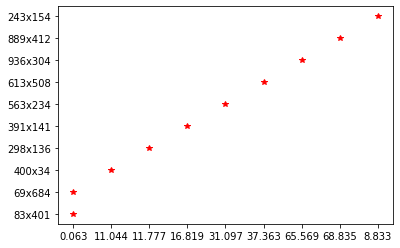

In [128]:
local_search.sort(key=bigger_value)

for i in local_search:
    times_local_search.append(i['Time'])
    length_local_search.append(i['Length'])
    
fig, ax = plt.subplots()
ax.plot(times_local_search, length_local_search, 'r*')
plt.show()

É possível observar que a estratégia de busca local segue a mesma tendência da heurística quanto maior a entrada maior o tempo de execução.

In [131]:
times_exhaustive_search_first_program = []
length_exhaustive_search = []
exaustive_search = []

for i in range(0, 10):
    n = random.randrange(20) # tamanho da primeira sequência
    m = random.randrange(20) # tamanho da segunda sequência
    file = 'dna.seq' # nome do arquivo a ser gerado
    f = open(file, 'w')
    seq=[str(n)+'\n',
        str(m)+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=m))]
    f.writelines(seq)
    f.close()
    
    initial_time = time.time()

    subprocess.run("./busca_exaustiva < dna.seq", shell=True)

    final_time = time.time()

    difference_between_times = final_time - initial_time

    exaustive_search.append({"Time": str("%.3f" % difference_between_times), "Length": str(n) + "x" + str(m), "Value": n + m})

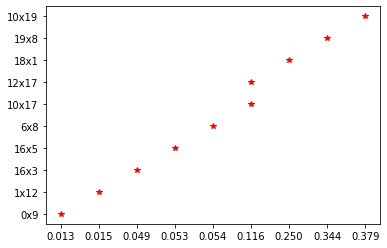

In [132]:
exaustive_search.sort(key=bigger_value)

for i in exaustive_search:
    times_exhaustive_search_first_program.append(i['Time'])
    length_exhaustive_search.append(i['Length'])
    
fig, ax = plt.subplots()
ax.plot(times_exhaustive_search_first_program, length_exhaustive_search, 'r*')
plt.show()

A busca exaustiva tem o mesmo comportamento dos outros dois códigos.